###IMPORTAR LIBRERIAS

In [72]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
#guardar los graficos en el cuaderno de jupyter
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

###IMPORTAR DATA SET





In [73]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


###CONOCIENDO LOS DATOS

In [74]:
df_psico.describe

<bound method NDFrame.describe of              usuario         op         co  ...         ne  wordcount  categoria
0       3gerardpique  34.297953  28.148819  ...   9.841575    37.0945          7
1    aguerosergiokun  44.986842  20.525865  ...  10.362406    78.7970          7
2     albertochicote  41.733854  13.745417  ...   8.836979    49.2604          4
3      AlejandroSanz  40.377154  15.377462  ...   5.032231    80.4538          2
4     alfredocasero1  36.664677  19.642258  ...   7.305968    47.0645          4
..               ...        ...        ...  ...        ...        ...        ...
135       XabiAlonso  35.569389  22.133740  ...  12.201221    47.5420          7
136    XaviRodriguez  31.960417  15.416979  ...  11.764583    47.5625          4
137        xoellopez  71.696129  12.489274  ...   3.241935    74.3065          2
138         ZacEfron  51.537405  26.009695  ...   7.284962   118.6107          1
139   _josecoronado_  36.258913  18.769348  ...   9.252065   113.7391      

In [75]:
df_psico.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

###GRAFICAMOS PARA MEJOR VISUALIZACIÓN

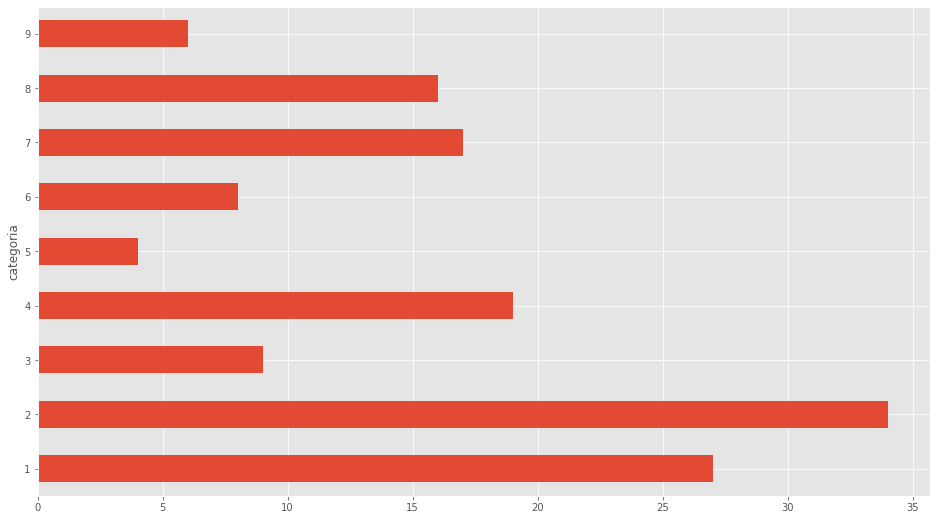

In [11]:
df_psico.groupby('categoria').size().plot.barh()

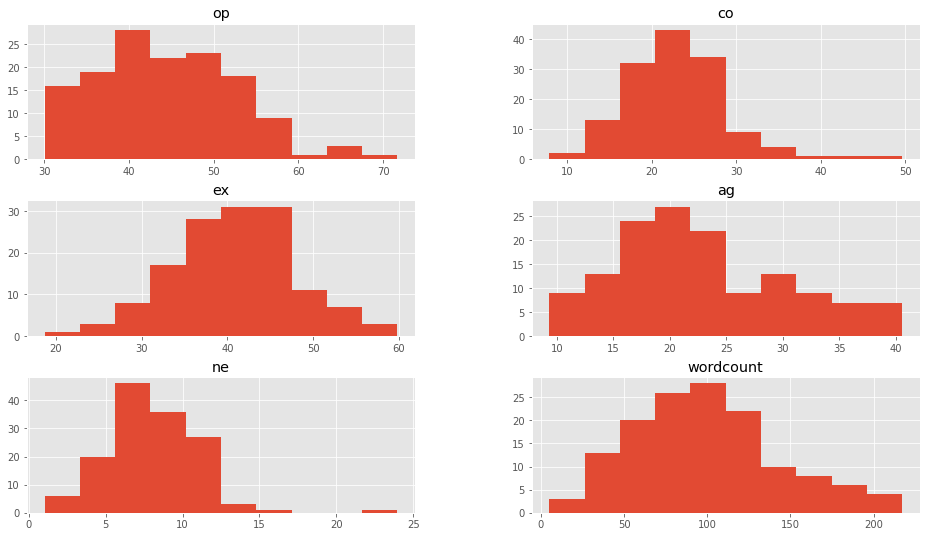

In [76]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


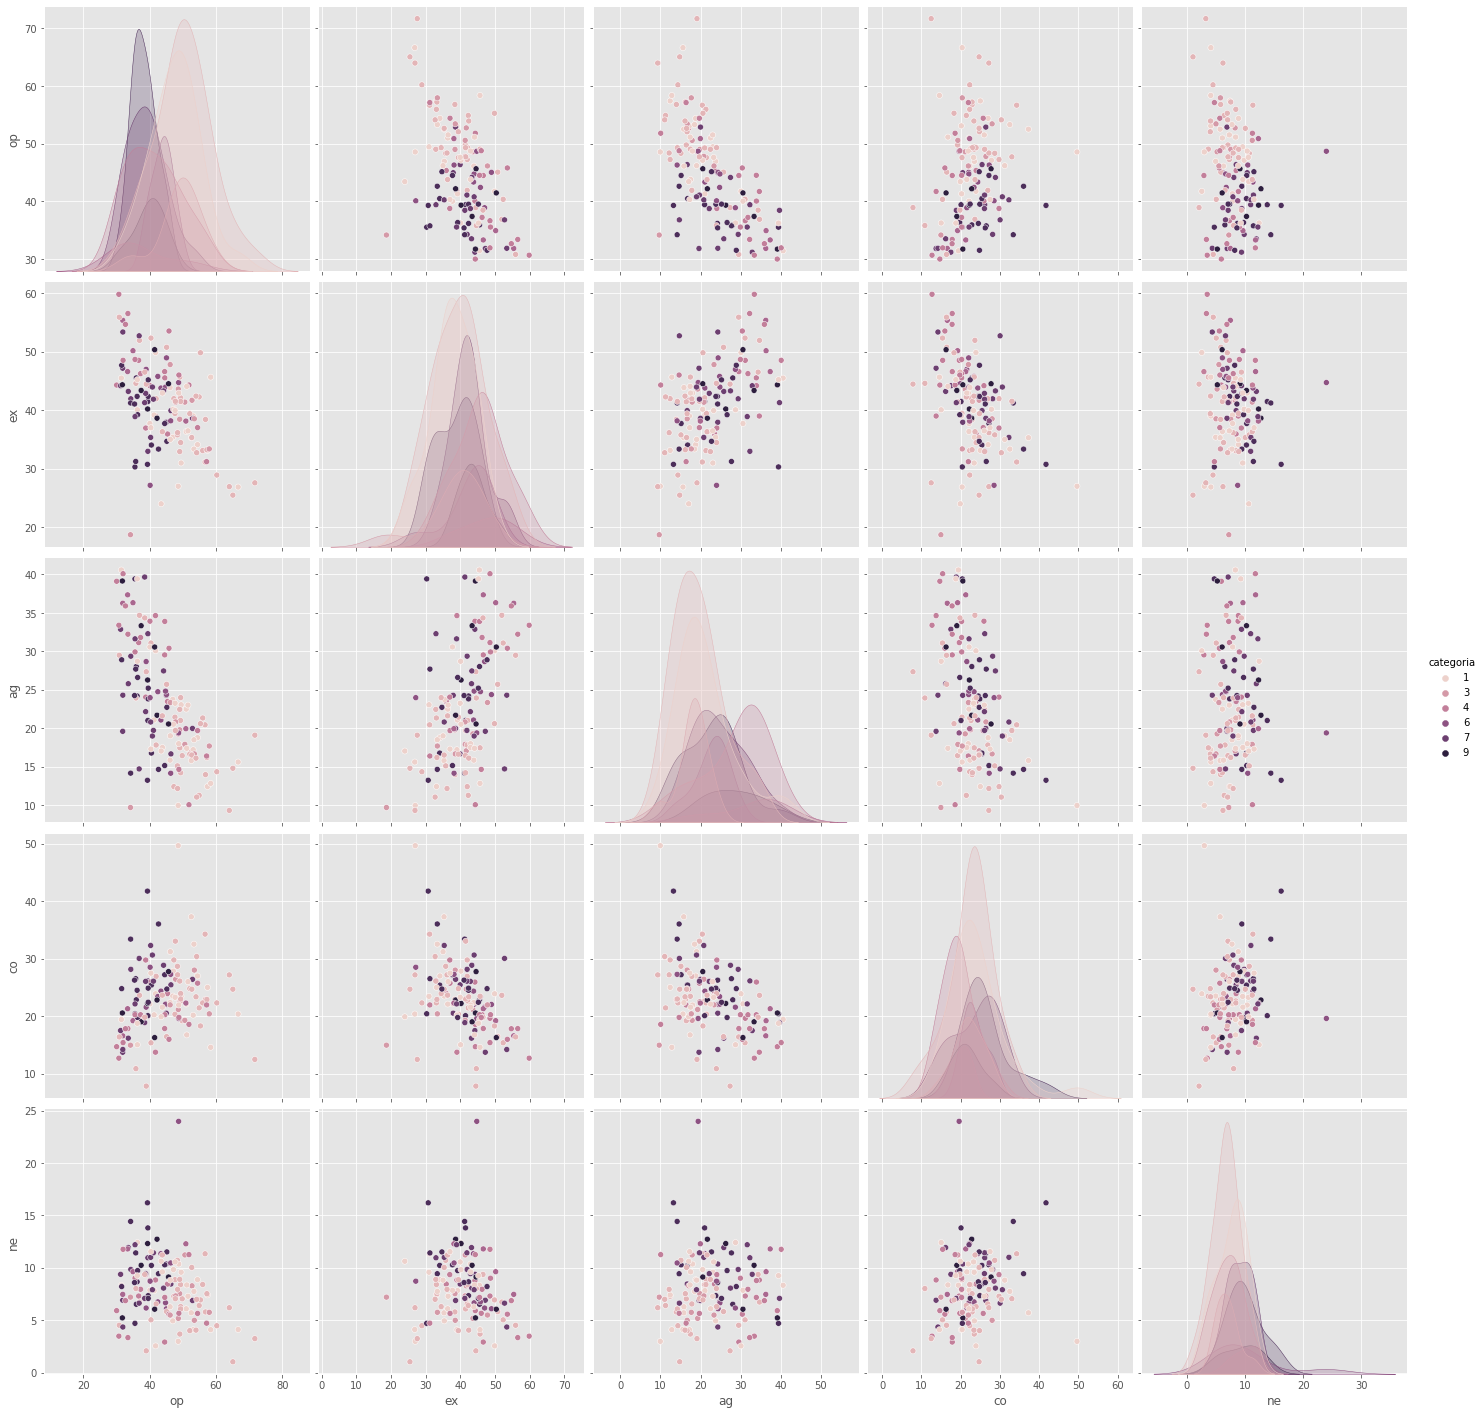

In [87]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag","co","ne"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías.

###PREPARAR DATOS X & Y

In [93]:
X = np.array(df_psico[["op","ex","ag","co","ne"]])
y = np.array(df_psico['categoria'])
X.shape

(140, 5)

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

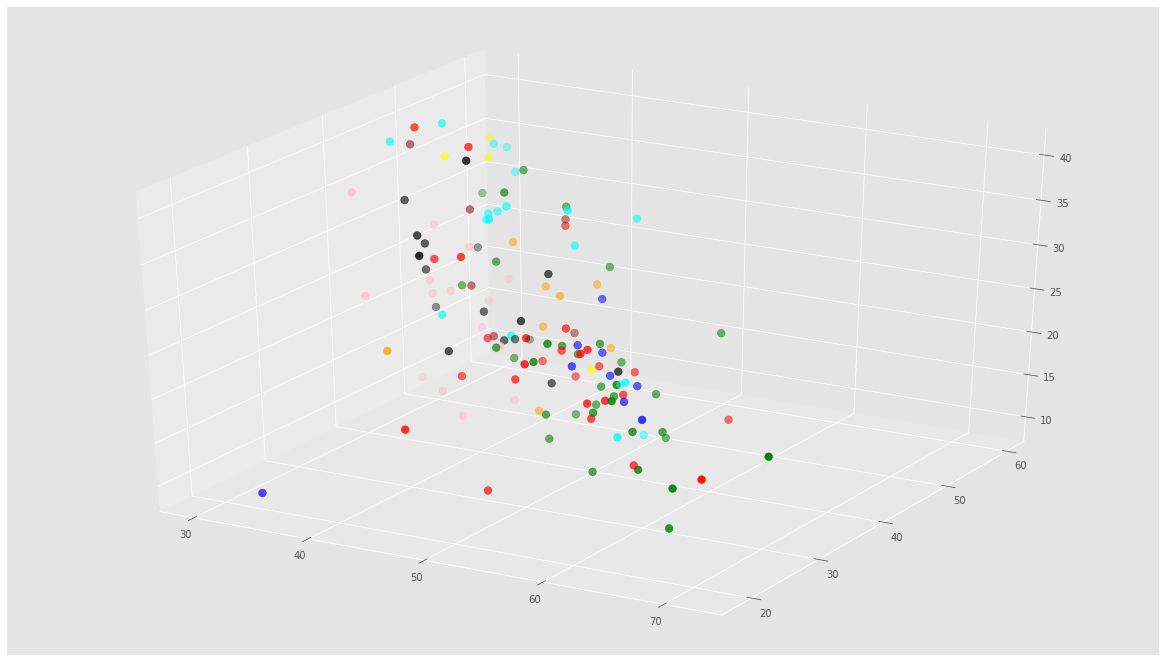

In [94]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

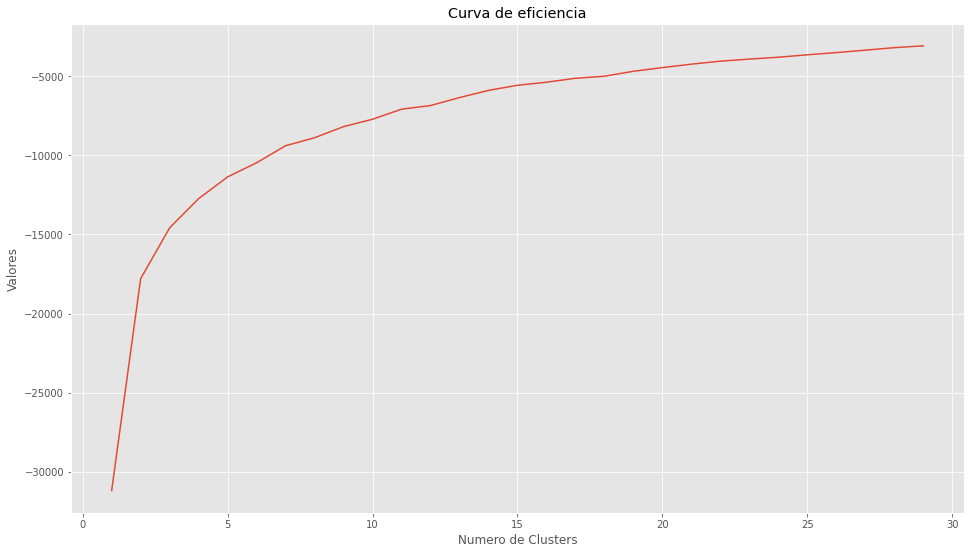

In [95]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

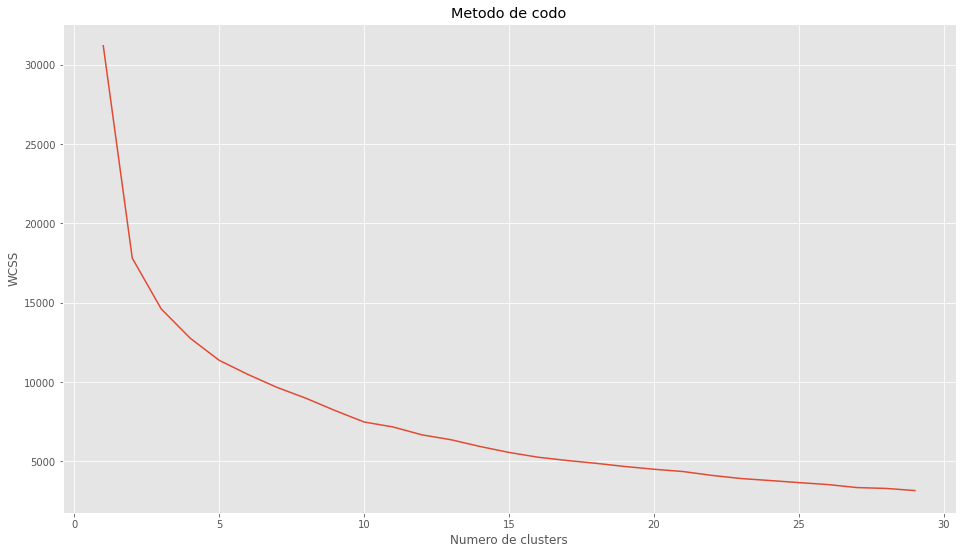

In [96]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[61.3400303  29.9734743  15.713261   21.9647076   5.2857775 ]
 [39.011414   41.73307945 24.06679158 23.88035868  9.455823  ]
 [50.39589747 41.92197047 17.69612306 22.40451803  7.68404221]
 [46.7527784  33.69478827 18.1413302  28.6610194   9.06314913]
 [36.5498492  47.92483034 33.12807637 18.15075871  6.88209971]]


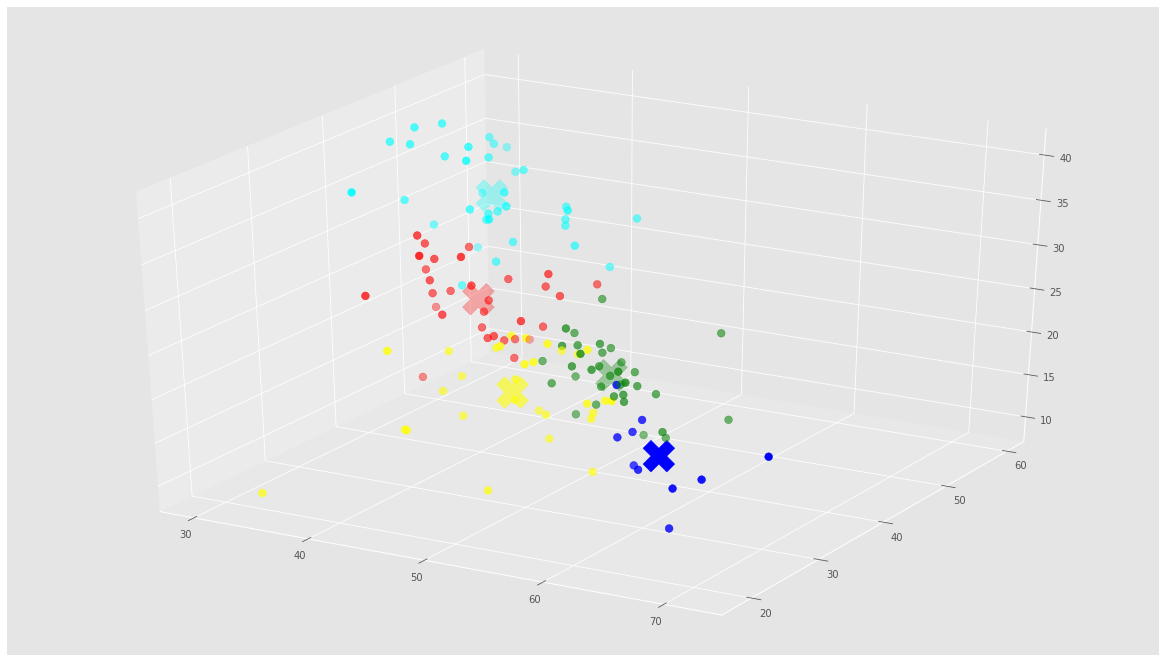

In [98]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan'] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='X', c=colores, s=1000)

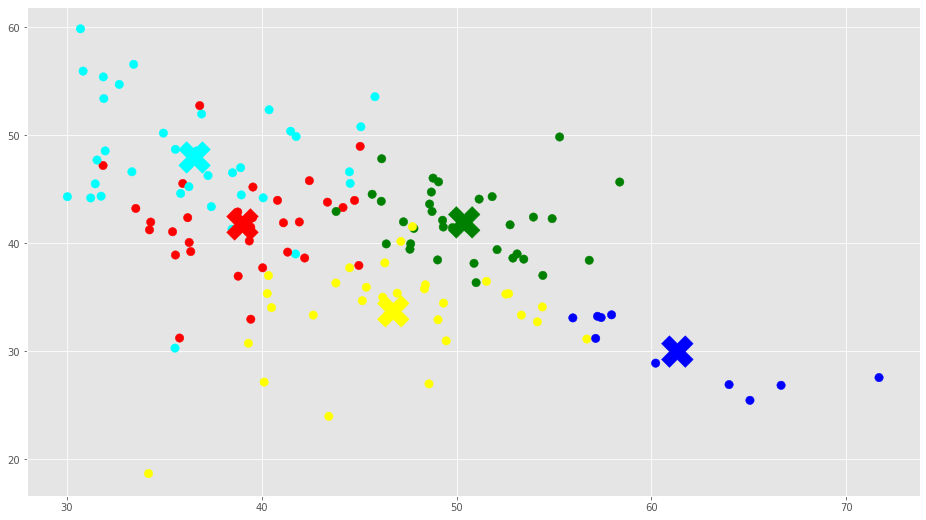

In [99]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='X', c=colores, s=1000)
plt.show()

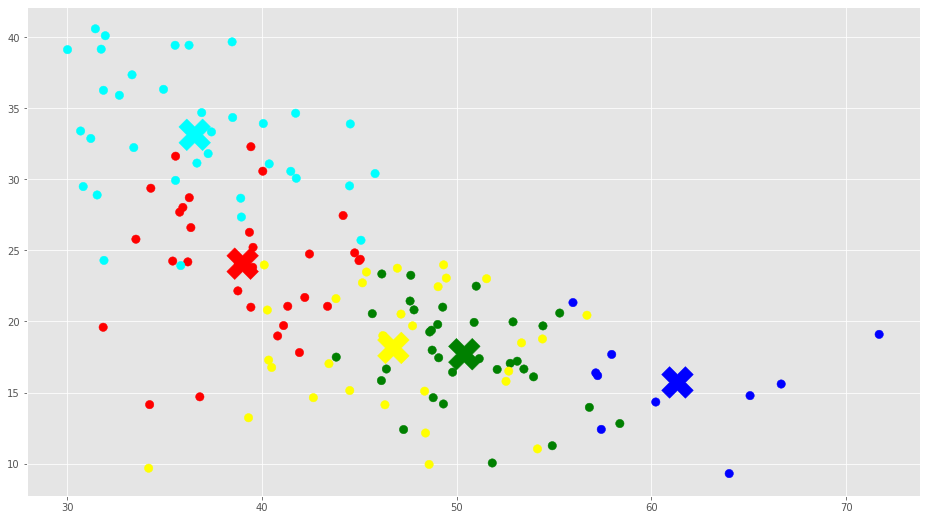

In [100]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='X', c=colores, s=1000)
plt.show()

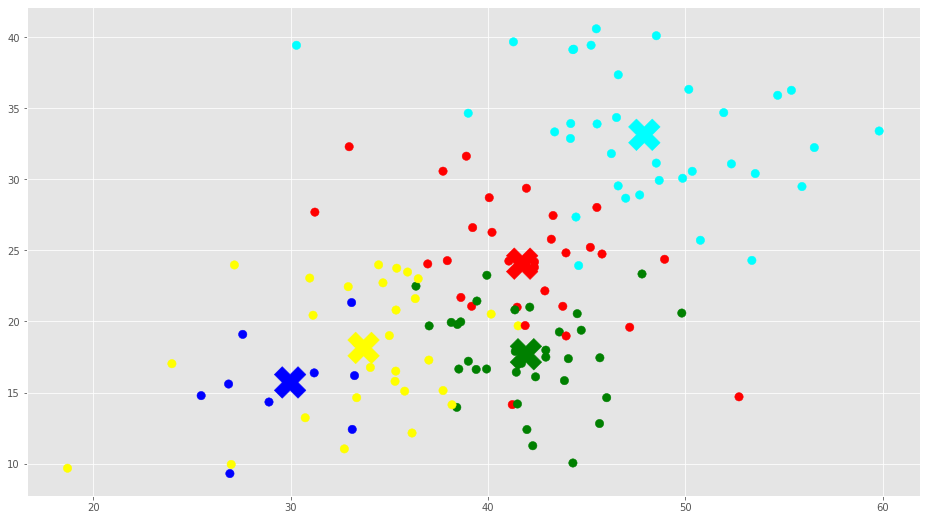

In [101]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='X', c=colores, s=1000)
plt.show()

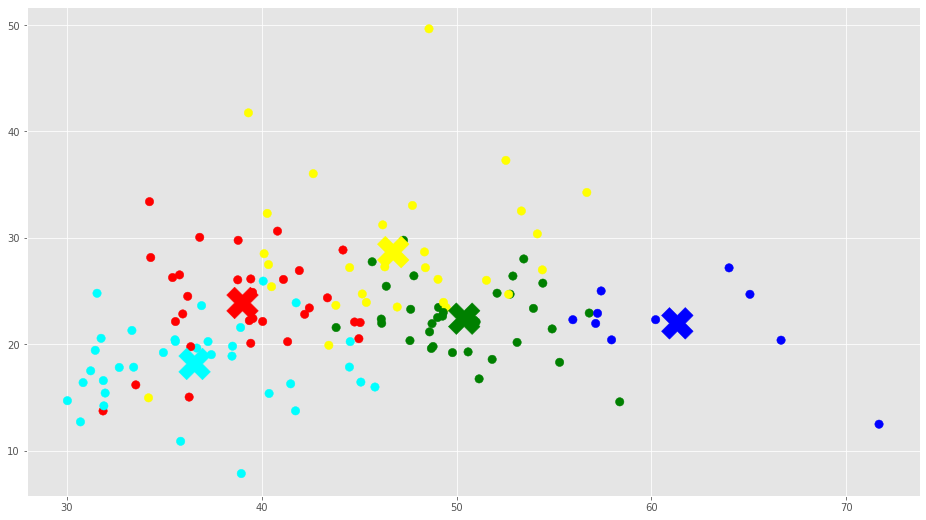

In [102]:
f1 = df_psico['op'].values
f2 = df_psico['co'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='X', c=colores, s=1000)
plt.show()

###RESULTADOS EN TABLAS

In [103]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,10
1,red,31
2,green,34
3,yellow,30
4,cyan,35


###DENSIDAD VS CATEGORIAS LABORALES

In [104]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,2.0
2,2,6.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


###USUARIOS CON RASGOS DE PERSONALIDAD SIMILARES

In [105]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,1
1,aguerosergiokun,1
2,albertochicote,4
3,AlejandroSanz,4
4,alfredocasero1,4


In [106]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
2,albertochicote,4
3,AlejandroSanz,4
4,alfredocasero1,4
7,andykusnetzoff,4
16,Berto_Romero,4
19,Buenafuente,4
20,CarlosAuryn,4
23,CasillasWorld,4
28,ChristianG_7,4
34,CristiPedroche,4


###USUARIOS MAS IMPORTANTES EN CADA CLOUSTER

In [107]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

foofighters
ierrejon
LeoDiCaprio
SJP
alfredocasero1


###CLASIFICANDO NUEVOS DATOS

In [109]:
#X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
X_new = np.array([[46.7527784,33.69478827,18.1413302,28.6610194,9.06314913]])
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[3]
